In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from PIL import Image

In [6]:
im_path = "/Users/wbandabarragan/Library/CloudStorage/Dropbox/Yachay_Tech/Semestre7_2025/CP1/"

In [7]:
img = Image.open(im_path + "clouds.jpg")

In [11]:
img_array = np.array(img)

print(img_array.shape)

(311, 453, 3)


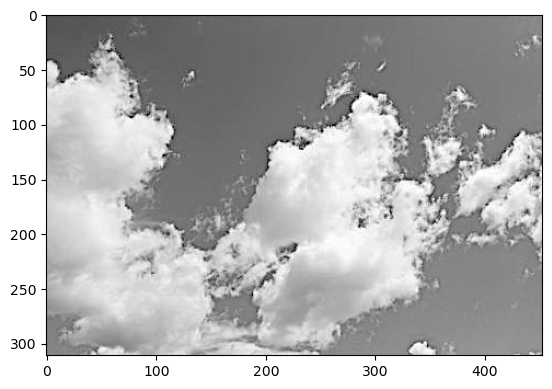

In [12]:
plt.figure()

plt.imshow(img_array)

plt.show()

In [13]:
fourier_img = np.fft.fft2(img_array)